<a href="https://colab.research.google.com/github/Shuhxian/Rain_Prediction/blob/main/Rain_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 7.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=c50609c3bb50d47cffae75fab946b5e6001e1342b43ccb79bfab5d3d18591c3f
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
!git clone https://github.com/Shuhxian/Rain_Prediction.git

Cloning into 'Rain_Prediction'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [3]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

In [18]:
temp=np.arange(0,40,0.01)
wind=np.arange(0,14,0.01)
atm=np.arange(28,32,0.01)
rate=np.arange(0,1,0.001)
rain=np.arange(0,100,0.01)

In [19]:
#Membership functions
temp_vl=fuzz.trapmf(temp,[0,0,5,10])
temp_l=fuzz.trimf(temp,[5,10,15])
temp_n=fuzz.trimf(temp,[10,15,20])
temp_h=fuzz.trimf(temp,[15,20,25])
temp_vh=fuzz.trimf(temp,[20,25,25])
wind_vl=fuzz.trimf(wind,[2,2,4])
wind_l=fuzz.trimf(wind,[2,4,6])
wind_n=fuzz.trimf(wind,[4,6,8])
wind_h=fuzz.trimf(wind,[6,8,10])
wind_vh=fuzz.trimf(wind,[8,10,12])
atm_l=fuzz.trapmf(atm,[28,28,29.8,30])
atm_n=fuzz.trimf(atm,[29.8,30,30.2])
atm_h=fuzz.trapmf(atm,[30,30.2,32,32])
rate_rc=fuzz.trapmf(rate,[0.04,0.18,1,1])
rate_sc=fuzz.trapmf(rate,[0.003,0.005,0.04,0.18])
rate_s=fuzz.trapmf(rate,[0,0,0.003,0.005])
rain_vl=fuzz.trimf(rain,[0,10,30])
rain_l=fuzz.trimf(rain,[10,30,50])
rain_n=fuzz.trimf(rain,[30,50,70])
rain_h=fuzz.trimf(rain,[50,70,90])
rain_vh=fuzz.trimf(rain,[70,90,100])

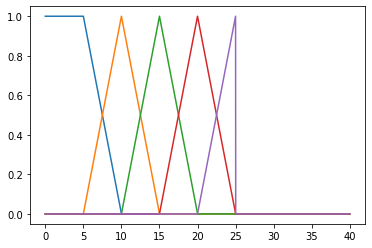

In [15]:
#Visualization of membership functions
plt.plot(temp,temp_vl,temp,temp_l,temp,temp_n,temp,temp_h,temp,temp_vh)

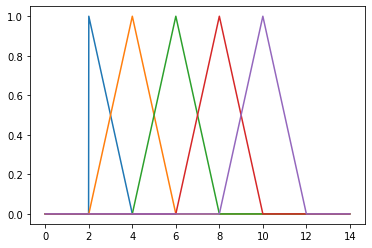

In [16]:
plt.plot(wind,wind_vl,wind,wind_l,wind,wind_n,wind,wind_h,wind,wind_vh)

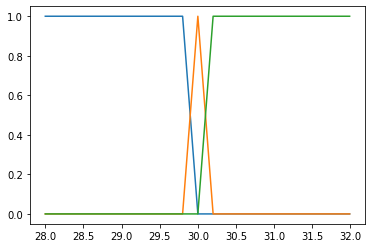

In [20]:
plt.plot(atm,atm_l,atm,atm_n,atm,atm_h)

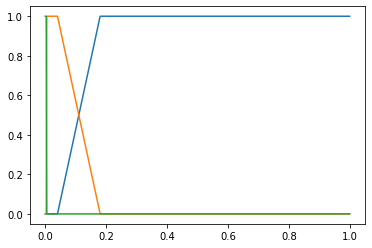

In [21]:
plt.plot(rate,rate_rc,rate,rate_sc,rate,rate_s)

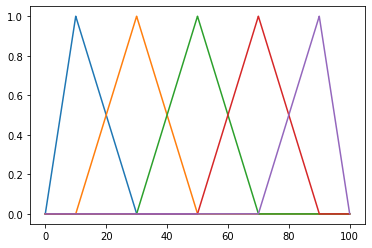

In [23]:
plt.plot(rain,rain_vl,rain,rain_l,rain,rain_n,rain,rain_h,rain,rain_vh)

In [ ]:
#Get membership degree
#is_young=fuzz.interp_membership(age,young,22) #domain, membership function, value
#is_mid=fuzz.interp_membership(age,mid,32)

In [ ]:
#Calculate firing strength
#fire_rule1=min(is_young,is_mid)

In [ ]:
#Calculate membership degree of output

#low=fuzz.trimf(age,[0,15,30])
#r1_out=np.fmin(fire_rule1,low) #Get the membership degree using the membership function
#r2_out=np.fmin(fire_rule1,low)
#fuz_out=np.fmax(r1_out,r2_out) #Aggregate the rules
#fuz_out

In [ ]:
#Defuzzification
#fuzz.defuzz(rain,fuz_out,"centroid") #centroid,bisector,mom,som,lom